In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [71]:
res1 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_R1.mat")
res2 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_R2.mat")
res3 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_R3.mat")
res4 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_R4.mat")
res5 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_15112024.mat")
res6 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_D2.mat")

In [72]:
Q11 = xy_values["p1_true"]
Q12 = xy_values["q1_true"]

In [73]:
xy_values

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue May 13 17:50:45 2025',
 '__version__': '1.0',
 '__globals__': [],
 'c4n': array([[0.     , 0.     ],
        [1.     , 0.     ],
        [0.     , 1.     ],
        ...,
        [0.90625, 1.     ],
        [0.96875, 0.9375 ],
        [0.96875, 1.     ]]),
 'p1_true': array([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [ 1.        ],
        [-0.41959247],
        [ 0.52083333]]),
 'q1_true': array([[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.09259384],
        [0.        ]])}

In [74]:
xy = xy_values["c4n"]
Q11_1 = res1["p1"].toarray()
Q12_1 = res1["q1"].toarray()

Q11_2 = res2["p1"].toarray()
Q12_2 = res2["q1"].toarray()

Q11_3 = res3["p1"].toarray()
Q12_3 = res3["q1"].toarray()

Q11_4 = res4["p1"].toarray()
Q12_4 = res4["q1"].toarray()

Q11_5 = res5["p1"].toarray()
Q12_5 = res5["q1"].toarray()

Q11_6 = res6["p1"].toarray()
Q12_6 = res6["q1"].toarray()

In [75]:
np.linalg.norm((Q12_1-Q12_6) , axis = 1) .mean()

np.float64(0.6249897818729983)

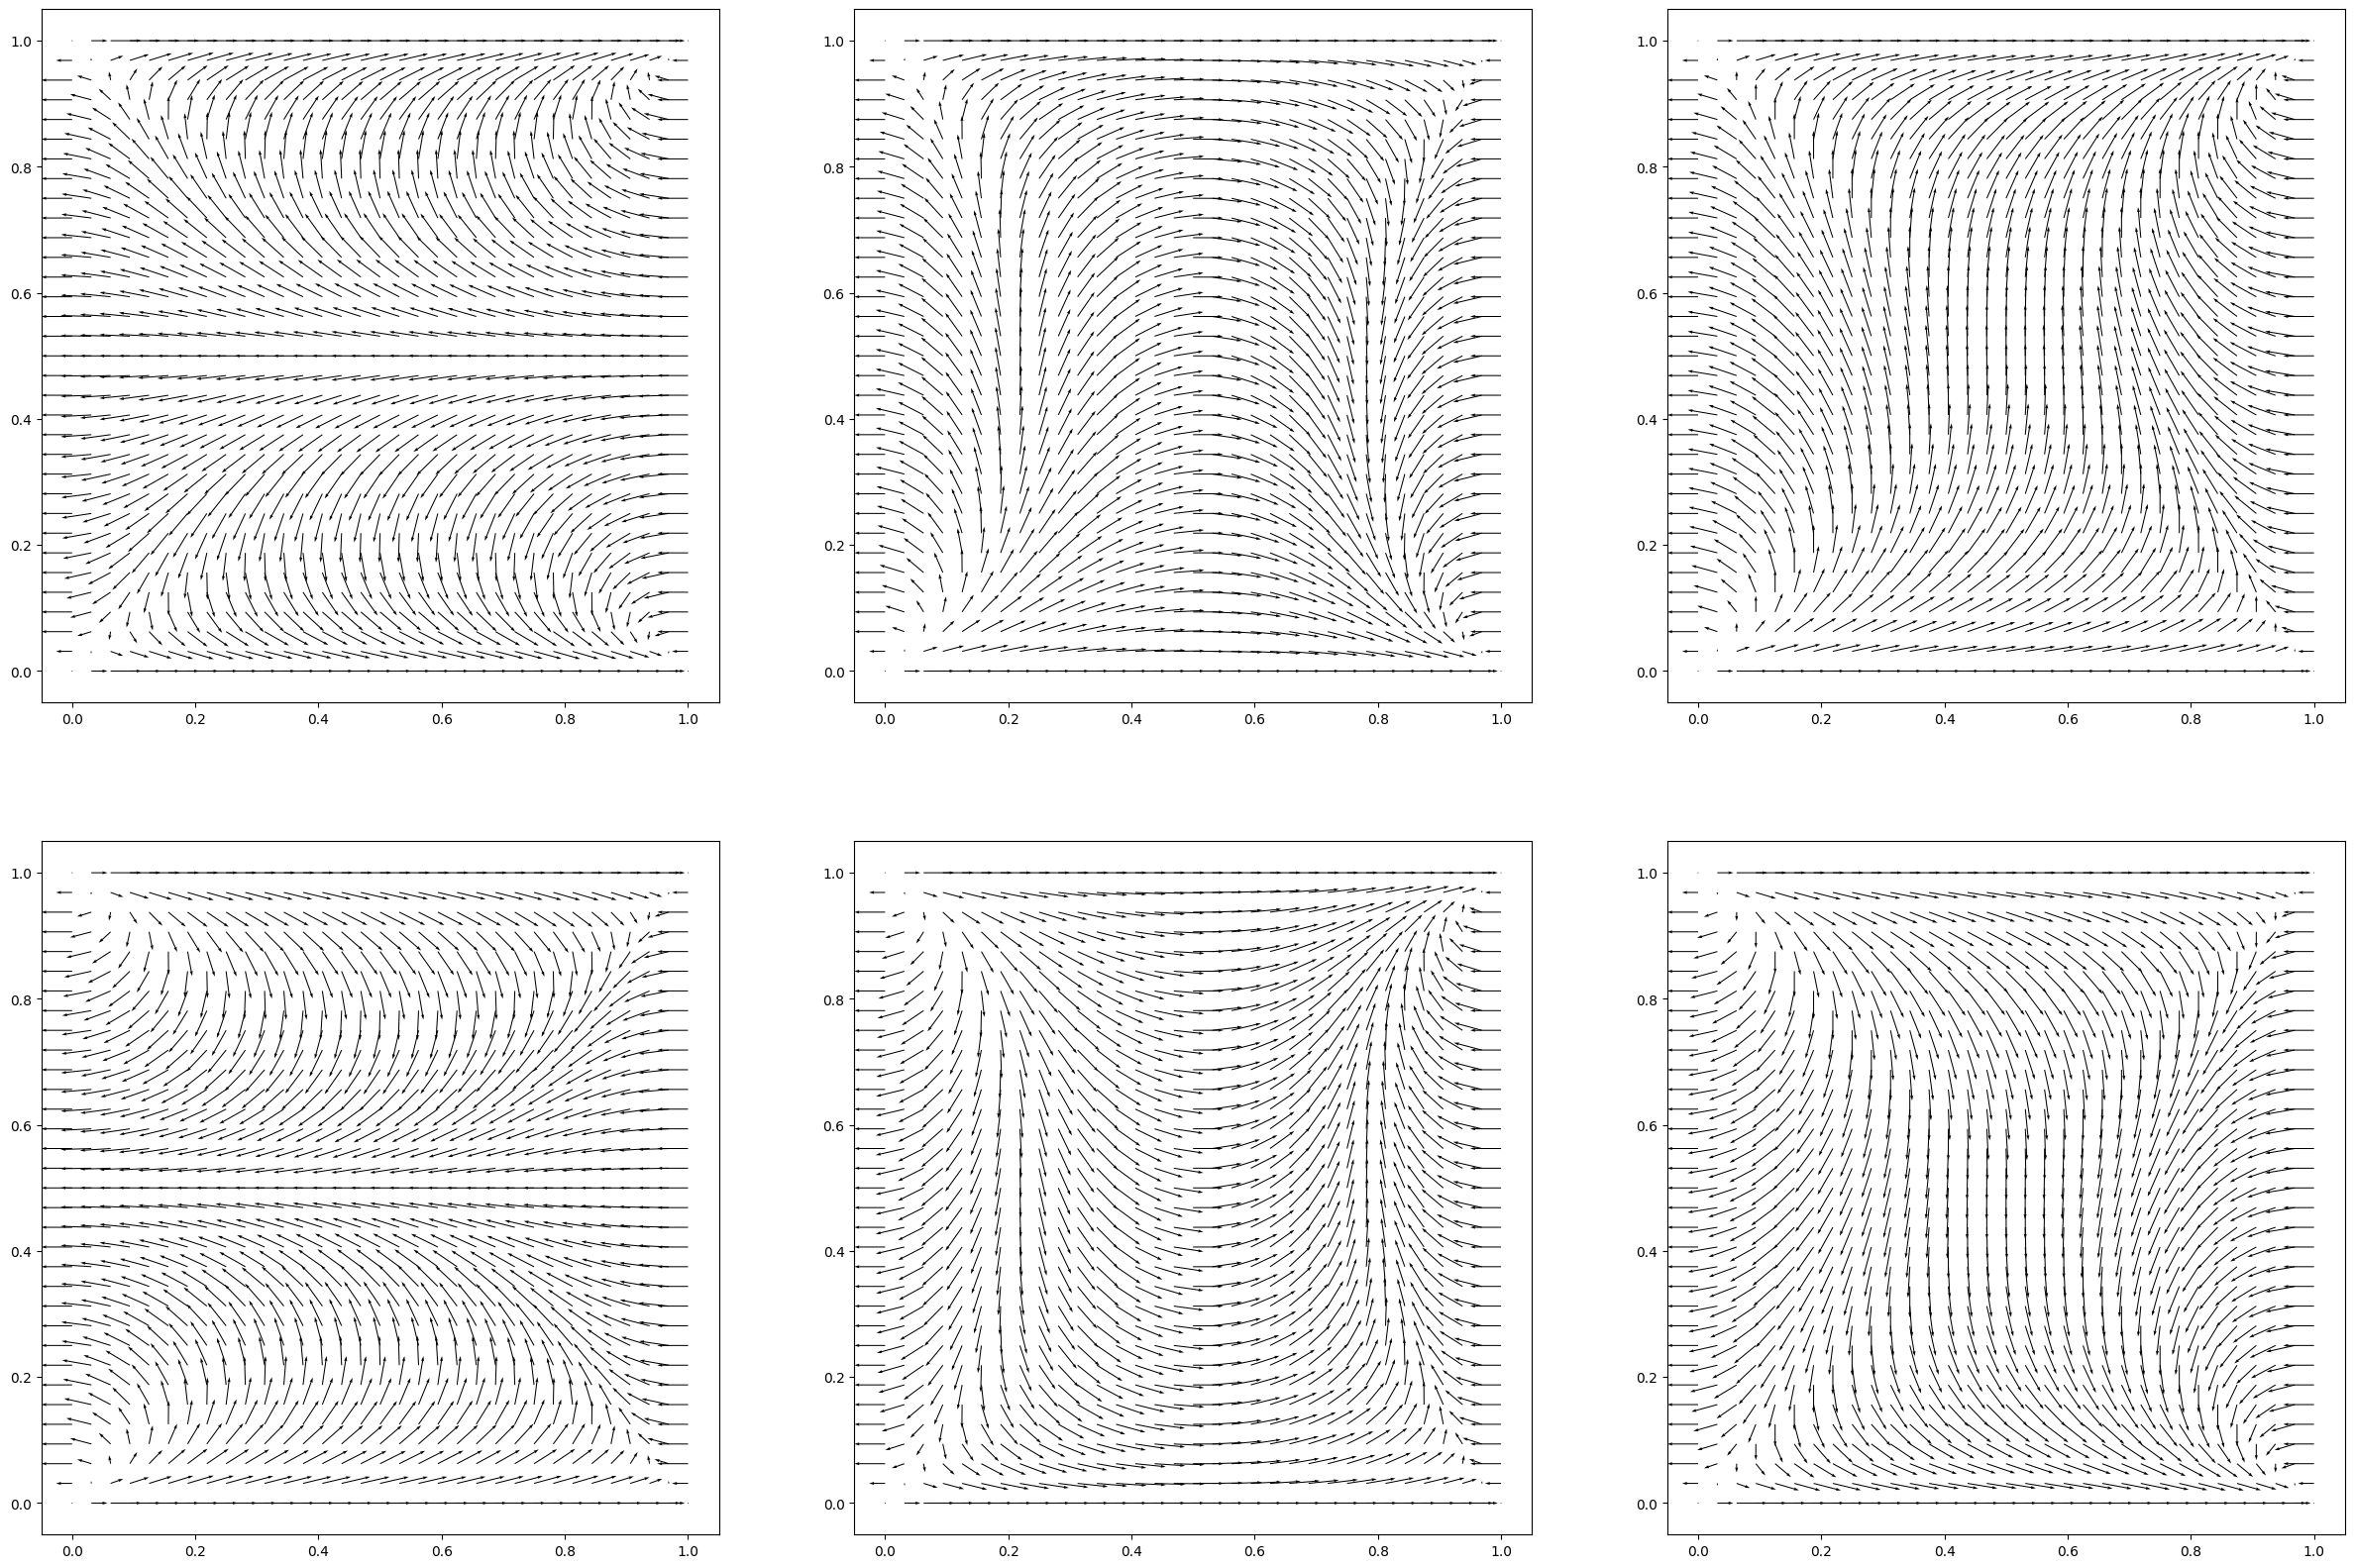

In [ ]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(20)
fig.set_figwidth(30)
ax[0,0].quiver(
                xy[:,0], xy[:,1],                             
                Q11_1,
                Q12_1,      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,0].quiver(
                xy[:,0], xy[:,1],                             
                Q11_2,
                Q12_2,      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[0,1].quiver(
                xy[:,0], xy[:,1],                             
                Q11_3,
                Q12_3,      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,1].quiver(
                xy[:,0], xy[:,1],                             
                Q11_4,
                Q12_4,      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[0,2].quiver(
                xy[:,0], xy[:,1],                             
                Q11_5,
                Q12_5,      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,2].quiver(
                xy[:,0], xy[:,1],                             
                Q11_6,
                Q12_6,      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )

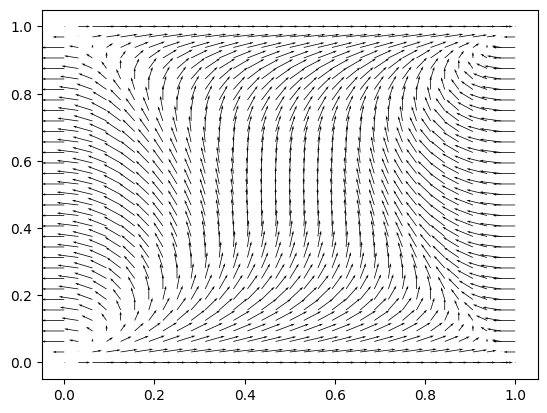

In [34]:
plt.quiver(
                xy[:,0], xy[:,1],                             
                Q11,
                Q12,      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )

In [35]:
#compute nematic director
theta = np.arctan( Q12/Q11  )
nematic_director1 = np.cos(theta)
nematic_director2 = np.sin(theta)

C:\Users\seand\AppData\Local\Temp\ipykernel_17024\1174496687.py:2: RuntimeWarning: invalid value encountered in divide
  theta = np.arctan( Q12/Q11  )


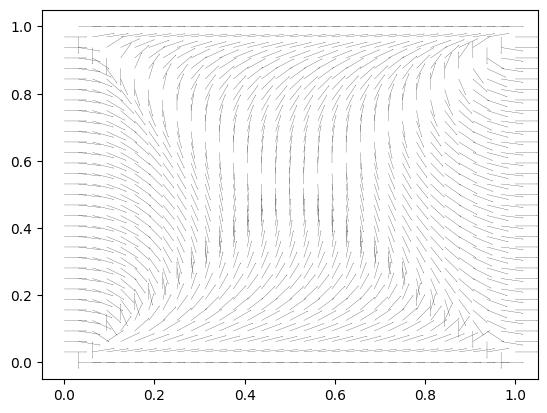

In [36]:
#plot nematic director
plt.quiver(
                xy[:,0], xy[:,1],                   
                nematic_director1,
                nematic_director2,      
                angles='xy', scale_units='xy', scale=20, width=0.0015*10/33
                )

In [37]:
from src.lossFunctions.Reduced2DimLDG import boundaryFunctionExtension
import torch

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [39]:
xyTesnor = torch.tensor(xy)
boundaryExtension = boundaryFunctionExtension(xyTesnor, d= 3*0.02).cpu().detach().numpy()

In [40]:
boundaryExtension

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [ 1.        ],
       [-0.47916667],
       [ 0.52083333]])

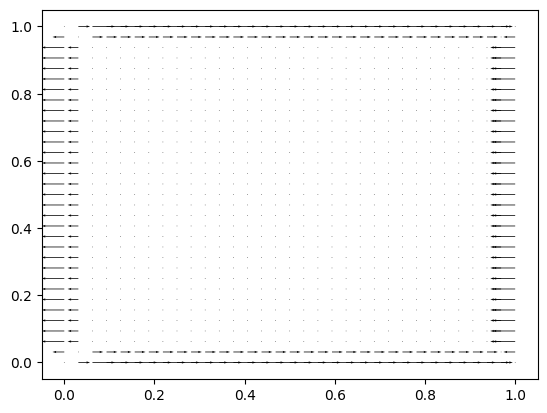

In [41]:
plt.quiver(
                xy[:,0], xy[:,1],                             
                boundaryExtension,
                np.zeros_like(xy[:,0]),      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )

In [42]:
from starDomainExtrapolation.starDomain import *

In [58]:
def boundaryConditionSpherical(starDomain, angles, boundaryFunction):
    return boundaryFunction(starDomain.getCartesianCoordinates( starDomain.radiusDomainFunciton(angles) ,angles))
  
def zeroOnBoundaryExtension(starDomain, input):
    radius, angles = starDomain.getSphericalCoordinates(input)
    return linearRadial( radius / starDomain.radiusDomainFunciton(angles)).view(-1,1)
  
def DCBoundaryExtension(starDomain,input, boundaryFunction):
    radius, angles = starDomain.getSphericalCoordinates(input)
    return boundaryConditionSpherical(starDomain, angles, boundaryFunction) *  (1- linearRadial( radius / starDomain.radiusDomainFunciton(angles))).view(-1,1) 


def linearRadial(x):
    return (1-x).view(-1,1)

In [59]:
def bfunc(x):
    return boundaryFunctionExtension(torch.cat((x[0],x[1]), dim=1), d= 0.06)

In [60]:
squareAsStarDom = HyperCuboid(2, torch.tensor([0.5,0.5]), torch.tensor([1.,1.]))
points = squareAsStarDom.generateCartesianRandomPointsFullDomain(6000)

out = DCBoundaryExtension(squareAsStarDom, points, bfunc)

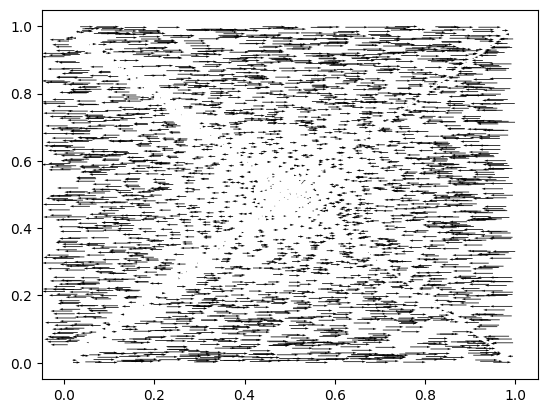

In [61]:
plt.quiver(
                points[0], points[1],                             
                out,
                np.zeros_like(points[0]),      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )